# a rough accessible calligraphy alphabet

my two calligraphy defaults are <q>fuck</q> and _the alphabet_.
we'll use this organic, non-gridded flowing alphabet as a challenge to cast as a tactile interaction with a screen reader.
the `map` element didn't work but the `table` family sure as shit will.

[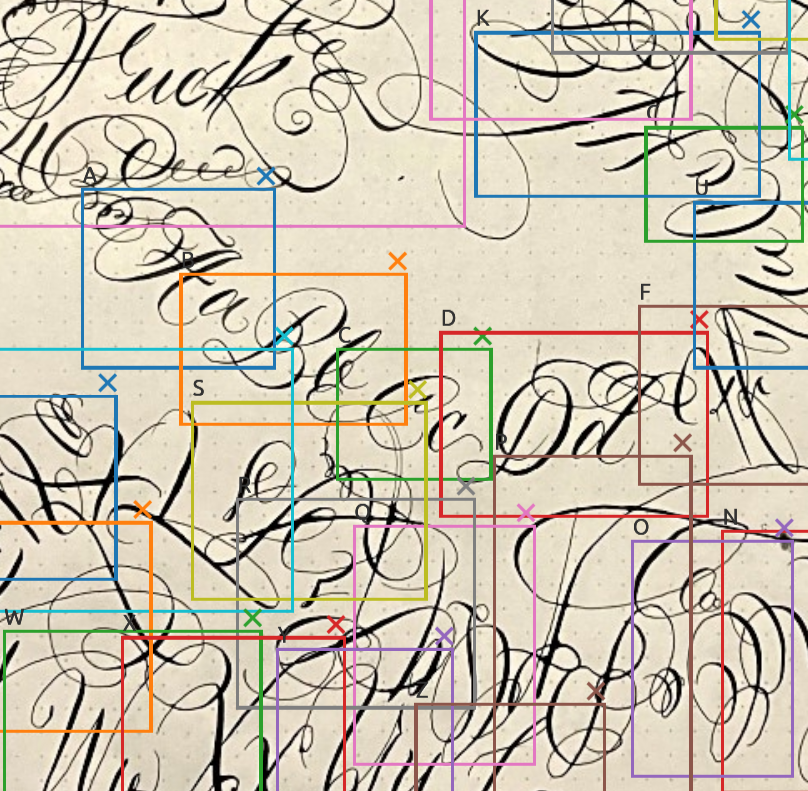](#abcdfuck)

while `map` didn't work, it did introduce the keyboard access and navigation aspect.

In [ ]:
%%
## using `jupyter_bbox_widget` to annotate calligraphy

[@garaleth] shared a widget specifically for annotating images in jupyterlab available with [`pip install jupyter_bbox_widget`][jupyter_bbox_widget].
it worked perfectly for annotating the letters in this non-gridded, wandering alphabet.

    AREAS:\
a file we save our annotations to, if we don't save them then they are lost when the kernel restarts.\

    = Path("abcdfuck.json")
    (widget := __import__("jupyter_bbox_widget").BBoxWidget(
        image="abcefuck.jpg", classes=list(string.ascii_uppercase) + "fuck".split(), 
        bboxes=pandas.read_json(AREAS).to_dict(orient="records"))
    );

[jupyter_bbox_widget]: #
[@garaleth]: #

In [ ]:
%%
## representing the bounding boxes as table with absolute positioning

format a table that contains the values in css variables

    from nbconvert_a11y.table import Table, TableOptions

    areas = DataFrame(widget.bboxes)
    table = Table(areas, id="abcdfuck", options=TableOptions(
        tfoot=TableOptions.Presentation.none
    )).build(css_values_str_quote={"label"}, )
    table.region.thead.attrs.setdefault("class", "")
    table.region.thead.attrs["class"] += "nv"
    table.region.form.clear()
    [x.attrs.update(tabindex=0) for x in table.table.select("tr")]
    table

In [ ]:
%%
###  absolute css positioning

```css
#abcdfuck {
    --u: 1px;
    --w: 800;
    --h: 601;
    box-sizing: border-box;
    position: relative;
    display: block;
    height: calc(var(--h) * var(--u));
    width: calc(var(--w) * var(--u));
    tbody {
        display: block;
        box-sizing: border-box;
        position: relative;
        height: calc(var(--h) * var(--u));
        width: calc(var(--w) * var(--u));
        top: 0;
        left: 0;
        tr {
            display: block;
            box-sizing: border-box;
            position: absolute;
            left: calc(var(--x) / var(--w) * 100%);
            top: calc(var(--y) / var(--h) * 100%);
            width: calc(var(--width) / var(--w) * 100%);
            height: calc(var(--height) / var(--h) * 100%);
            background: unset;
            border: 2px solid;
            &:before {
                content: var(--label);
            }
            th, td {
                display: none;
            }
        }
    }
    tbody {
    }

}
.nv, .visually-hidden {
    clip: rect(0 0 0 0);
    clip-path: inset(50%);
    height: 1px;
    overflow: hidden;
    position: absolute;
    white-space: nowrap;
    width: 1px;
}
```

In [ ]:
%%
### css background image

    Css((
```css
#abcdfuck {
    background: url(data:image/jpg;base64,%s);
}
```
    ) % base64.b64encode(Path("abcefuck.jpg").read_bytes()).decode())